<a href="https://colab.research.google.com/github/RishiBose04/DL-NN/blob/main/WSRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [35]:
N = 10000
Tp = 8000
t= np.arange(0,N)
x=np.sin(0.02*t)*2*np.random.rand(N)
df=pd.DataFrame(x)
df.head()


,0
0,0.000000
1,0.039997
2,0.045480
3,0.002967
4,0.047633


<function matplotlib.pyplot.show(close=None, block=None)>

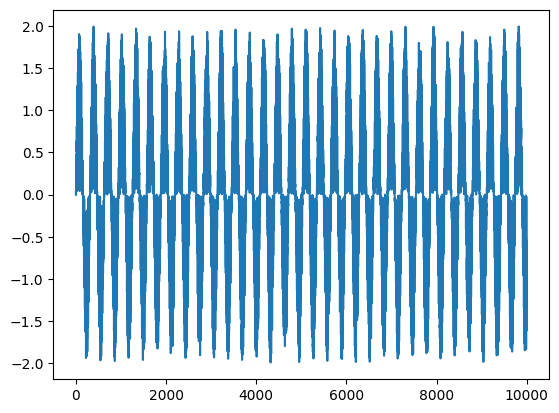

In [36]:
plt.plot(df)
plt.show


In [37]:
values=df.values
train,test=values[0:Tp,], values[Tp:N,:]

In [38]:
step=4
test=np.append(test,np.repeat(test[-1,],step))
train=np.append(train,np.repeat(test[-1,],step))

In [39]:
def converTOmatrix(data,step):
  x,y=[],[]
  for i in range(len(data)-step):
    d=i+step
    x.append(data[i:d,])
    y.append(data[d,])
  return np.array(x), np.array(y)


In [40]:
trainx,trainy=converTOmatrix(train,step)
testx,testy=converTOmatrix(test,step)

In [41]:
trainx=np.reshape(trainx, (trainx.shape[0], 1,trainx.shape[1]))
testx =np.reshape(testx, (testx.shape[0], 1,testx.shape[1]))
trainx.shape
testx.shape

(2000, 1, 4)

In [42]:
# prompt: simple rnn model

model=Sequential()
model.add(SimpleRNN(units=32,input_shape=(1,step),activation="relu"))
model.add(Dense(0,activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()




Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 32)                1184      
                                                                 
 dense_9 (Dense)             (None, 0)                 0         
                                                                 
 dense_10 (Dense)            (None, 1)                 1         
                                                                 
Total params: 1185 (4.63 KB)
Trainable params: 1185 (4.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# prompt: fit model and predict in trian and test

model.fit(trainx,trainy,epochs=100,batch_size=16,verbose=2)
trainPredict=model.predict(trainx)
testPredict=model.predict(testx)
predict=np.concatenate((trainPredict,testPredict),axis=0)



Epoch 1/100
500/500 - 1s - loss: 0.6747 - 1s/epoch - 2ms/step
Epoch 2/100
500/500 - 1s - loss: 0.6747 - 534ms/epoch - 1ms/step
Epoch 3/100
500/500 - 1s - loss: 0.6747 - 567ms/epoch - 1ms/step
Epoch 4/100
500/500 - 1s - loss: 0.6747 - 786ms/epoch - 2ms/step
Epoch 5/100
500/500 - 1s - loss: 0.6747 - 527ms/epoch - 1ms/step
Epoch 6/100
500/500 - 1s - loss: 0.6747 - 528ms/epoch - 1ms/step
Epoch 7/100
500/500 - 1s - loss: 0.6747 - 534ms/epoch - 1ms/step
Epoch 8/100
500/500 - 1s - loss: 0.6747 - 527ms/epoch - 1ms/step
Epoch 9/100
500/500 - 1s - loss: 0.6747 - 539ms/epoch - 1ms/step
Epoch 10/100
500/500 - 1s - loss: 0.6747 - 553ms/epoch - 1ms/step
Epoch 11/100
500/500 - 1s - loss: 0.6747 - 534ms/epoch - 1ms/step
Epoch 12/100
500/500 - 1s - loss: 0.6747 - 560ms/epoch - 1ms/step
Epoch 13/100
500/500 - 1s - loss: 0.6747 - 555ms/epoch - 1ms/step
Epoch 14/100
500/500 - 1s - loss: 0.6747 - 558ms/epoch - 1ms/step
Epoch 15/100
500/500 - 1s - loss: 0.6747 - 546ms/epoch - 1ms/step
Epoch 16/100
500/500 -

In [33]:
# prompt: check loss

trainscore=model.evaluate(trainx,trainy,verbose=0)
print(trainscore)


0.6778523325920105
